# Exploring the Weather in Athens
---

> *Name:* Panagiota Gkourioti <br />
> *Student ID:* p2822109 <br />
> *Course:* Business Analytics Practicum I <br />
> *Professor:* Panos Louridas <br />

> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />

## Description of the case

This notebook focuses on exploring the weather conditions in Athens for a period of more than 50 years, from 1955 to 2020.

## Load the necessary libraries

Initially, the necessary libraries that will be used in this project are imported.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
matplotlib.style.use('ggplot')

## Obtain and Read the Data

The datasets used for the analysis were obtained from two sources:

* The [National Oceanic and Atmospheric Administration's National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/search). 

* The [Hellenic Data Service](https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f).

### Hellinikon data

* The first dataset, <code>hellinikon.csv</code>, contains the data downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information and refers to the weather station of Hellinikon during the period from 1955-01-01 to 2020-12-31.

* Units were set to "Metric" in order to get millimeters for precipitation and Celsius for temperatures.

* The features included are described below:

| Feature | Description |
| ------------- |:-------------:| 
| STATION | Station identification code, referring to Hellinikon station, Greece |
| DATE | Date of record |
| PRCP | Precipitation (mm) |
| TAVG | Average Temperature (°C)|
| TMAX | Maximum Temperature (°C) |
| TMIN | Minimum Temperature (°C)|

* We read the data, which is located in `data` folder, set DATE as datetime object and check the first records.

In [49]:
hellinikon = pd.read_csv('data\\hellinikon.csv', parse_dates=['DATE'])

hellinikon.head()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
0,GR000016716,1955-01-01,0.0,NaN,18.5,10.2
1,GR000016716,1955-01-02,2.0,NaN,14.4,7.0
2,GR000016716,1955-01-03,0.0,NaN,15.8,9.6
3,GR000016716,1955-01-04,0.0,NaN,18.8,7.3
4,GR000016716,1955-01-05,0.0,NaN,17.9,8.4


* We remove the Station column, since it is the same for all records (Hellinikon station) and check again the first records as well as the data types, which are correct.

In [50]:
del hellinikon['STATION']

hellinikon.head()

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.0,NaN,18.5,10.2
1,1955-01-02,2.0,NaN,14.4,7.0
2,1955-01-03,0.0,NaN,15.8,9.6
3,1955-01-04,0.0,NaN,18.8,7.3
4,1955-01-05,0.0,NaN,17.9,8.4


In [4]:
hellinikon.dtypes

DATE    datetime64[ns]
PRCP           float64
TAVG           float64
TMAX           float64
TMIN           float64
dtype: object

### Athens data

* The second dataset, <code>athens.csv</code>, contains the data downloaded from the Hellenic Data Service and refers to the weather station of Athens during the period from 2010-01-01 to 2019-12-31.
* The features included are the same with the hellinikon dataset (DATE, PRCP, TAVG, TMAX, TMIN)

* We read the data,  which is located in `data` folder, while simultaneously setting DATE as datetime object, removing unwanted columns and setting "---" values as missing values. We then check the first records.

In [48]:
athens = pd.read_csv('data\\athens.csv', usecols=[0, 1, 2, 3, 10], na_values=['---'], 
                     parse_dates=['DATE'], names=['DATE','TAVG', 'TMAX', 'TMIN', 'PRCP'])

athens.head()

,DATE,TAVG,TMAX,TMIN,PRCP
0,2010-01-01,17.9,18.1,17.8,0.2
1,2010-01-02,15.6,15.7,15.5,0.0
2,2010-01-03,13.5,13.6,13.4,0.0
3,2010-01-04,9.5,9.6,9.5,0.0
4,2010-01-05,13.4,13.5,13.4,0.0


* We also check the data types, which are correct.

In [22]:
athens.dtypes

DATE    datetime64[ns]
TAVG           float64
TMAX           float64
TMIN           float64
PRCP           float64
dtype: object

## Data exploration

By observing at the descriptive statistics, we get an initial picture of the data. 

Regarding temperatures, the maximum values are 42°C for Hellinikon and 35.5°C for Athens station, while the minimum are -4.2°C for Hellinikon and 0.7°C for Athens. The temperatures on average seem normal for Greece, so we assume that the information is correct. 

Regarding precipitation, the minimum values are close to 0, which means no rain, and the maximum are 142 mm for Hellinikon and 97 mm for Athens station, which is also explained by some heavy rainfalls recorded.

In [6]:
hellinikon.describe()

,PRCP,TAVG,TMAX,TMIN
count,22773.000000,20940.000000,22307.000000,22418.000000
mean,1.011316,18.273873,22.350191,14.471706
std,4.633756,6.926203,7.392810,6.462051
min,0.000000,-2.000000,1.000000,-4.200000
25%,0.000000,12.700000,16.600000,9.400000
50%,0.000000,17.700000,21.800000,14.200000
75%,0.000000,24.300000,28.700000,20.000000
max,142.000000,34.800000,42.000000,30.400000


In [7]:
athens.describe()

,TAVG,TMAX,TMIN,PRCP
count,3649.000000,3649.000000,3649.000000,3652.000000
mean,19.443245,19.543574,19.345574,1.255531
std,7.143639,7.154859,7.132787,4.993957
min,0.800000,0.900000,0.700000,0.000000
25%,13.700000,13.800000,13.600000,0.000000
50%,18.900000,19.000000,18.800000,0.000000
75%,25.800000,25.900000,25.700000,0.000000
max,35.300000,35.500000,35.200000,97.000000


### Missing dates
 
The next step of the data exploration is to check for missing dates in the hellinikon dataset, between 1955-01-01 and 2020-12-31.

In [8]:
hellinikon = hellinikon.set_index('DATE')
# find missing dates between 1955-01-01 and 2020-12-31
idx = pd.date_range(start='1955-01-01', end='2020-12-31').difference(hellinikon.index)
hellinikon = hellinikon.reset_index()
print(idx)

DatetimeIndex(['2006-01-31', '2006-02-03', '2007-08-28', '2012-05-26',
               '2012-05-27', '2012-05-28', '2012-05-31', '2012-06-01',
               '2012-06-02', '2012-06-03',
               ...
               '2017-09-10', '2017-09-20', '2017-09-21', '2017-09-23',
               '2017-09-27', '2017-10-02', '2017-10-08', '2017-10-15',
               '2017-10-27', '2018-09-17'],
              dtype='datetime64[ns]', length=856, freq=None)


It is observed that 856 days are missing, from 2006 to 2018. We then group by year in order to search where the missing dates are located.

In [9]:
missing_dates = idx.to_frame(index=False, name='DATE')
print("\nCount of missing dates in hellinikon dataset:\n\n", pd.to_datetime(missing_dates['DATE']).dt.year.value_counts())


Count of missing dates in hellinikon dataset:

 2013    355
2014    267
2012    206
2017     23
2006      2
2007      1
2016      1
2018      1
Name: DATE, dtype: int64


It is observed that most missing dates are in 2012-2014 and some in 2017. Therefore, we could use the <code>athens.csv</code> file to impute the missing dates.

We also explore the athens dataset for missing values.

In [10]:
athens = athens.set_index('DATE')
# find missing dates between 2010-01-01 and 2019-12-31
idx2 = pd.date_range(start='2010-01-01', end='2019-12-31').difference(athens.index)
athens = athens.reset_index()
print(idx2)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


No missing dates found in the athens dataset.

### Missing values

Additionaly, we check for missing values in the hellinikon dataset and find specifically the missing values within the time period of 2010-2019 in order to fill them using the athens dataset.

In [11]:
print(" \nCount of missing values in hellinikon dataset: \n\n", hellinikon.isnull().sum())

 
Count of missing values in hellinikon dataset: 

 DATE       0
PRCP     478
TAVG    2311
TMAX     944
TMIN     833
dtype: int64


In [12]:
hellinikon2 = hellinikon.loc[(hellinikon['DATE'] >= '2010-01-01') & (hellinikon['DATE'] <= '2019-12-31')]
print(" \nCount of missing values in hellinikon dataset (2010-2019): \n\n", hellinikon2.isnull().sum())

 
Count of missing values in hellinikon dataset (2010-2019): 

 DATE      0
PRCP    102
TAVG      0
TMAX    820
TMIN    449
dtype: int64


We observe that for period 2010-2019, 102 values concerning precipitation are missing, while there are no missing values for average temperature.

Given that there is available data for minimum and maximum temperatures, we could fill the average temperatures using the mean of the two values.

In [30]:
print(" \nCount of missing values in athens dataset: \n\n", athens.isnull().sum())

 
Count of missing values in athens dataset: 

 DATE    0
TAVG    3
TMAX    3
TMIN    3
PRCP    0
dtype: int64


The athens dataset has very few missing values, therefore it will be useful in filling the missing ones from the other dataset.

## Data completeness

After the exploratory data analysis, we proceed to join the two datasets in order to fill in the missing dates and some of the missing values. Specifically, the missing values for precipitation (PRCP) from hellinikon dataset are replaced with the values from athens dataset and the missing values for average temperature (TAVG) are filled using the calculated average of maximum temperature (TMAX) and minimum temperature (TMIN) for the corresponding day.

In [13]:
# merge and sort by date
complete = pd.merge(hellinikon, athens, how ="outer", on ="DATE", suffixes=('_hel', '_ath'))
complete = complete.sort_values(by=["DATE"])
complete

,DATE,PRCP_hel,TAVG_hel,TMAX_hel,TMIN_hel,TAVG_ath,TMAX_ath,TMIN_ath,PRCP_ath
0,1955-01-01,0.0,NaN,18.5,10.2,NaN,NaN,NaN,NaN
1,1955-01-02,2.0,NaN,14.4,7.0,NaN,NaN,NaN,NaN
2,1955-01-03,0.0,NaN,15.8,9.6,NaN,NaN,NaN,NaN
3,1955-01-04,0.0,NaN,18.8,7.3,NaN,NaN,NaN,NaN
4,1955-01-05,0.0,NaN,17.9,8.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.6,NaN,NaN,NaN,NaN,NaN,NaN
23247,2020-12-28,6.6,14.8,18.2,11.9,NaN,NaN,NaN,NaN
23248,2020-12-29,0.0,16.3,19.9,12.5,NaN,NaN,NaN,NaN
23249,2020-12-30,0.0,16.4,19.9,14.8,NaN,NaN,NaN,NaN


In [14]:
# fill NaN values from PRCP_hel using PRCP_ath
complete['PRCP_hel'] = complete['PRCP_hel'].fillna(complete['PRCP_ath'])
# fill NaN values from TAVG_hel using TAVG_ath
complete['TAVG_hel'] = complete['TAVG_hel'].fillna(complete['TAVG_ath'])
# check, for example, if missing values for year 2013 (which had the most NaNs) have been filled
complete[complete['DATE'].dt.year.isin(range(2013, 2020))].head(5)

,DATE,PRCP_hel,TAVG_hel,TMAX_hel,TMIN_hel,TAVG_ath,TMAX_ath,TMIN_ath,PRCP_ath
23457,2013-01-01,0.0,11.3,NaN,NaN,11.3,11.4,11.2,0.0
23458,2013-01-02,0.0,10.9,NaN,NaN,10.9,11.0,10.7,0.0
23459,2013-01-03,0.2,11.6,NaN,NaN,11.6,11.7,11.5,0.2
23460,2013-01-04,0.0,11.2,NaN,NaN,11.2,11.3,11.0,0.0
23461,2013-01-05,0.0,11.3,NaN,NaN,11.3,11.4,11.2,0.0


In [15]:
# check if the 102 precipitation values have been filled (376 missing remaining)
print("\nCount of missing values in complete dataset: \n\n", complete.isnull().sum())


Count of missing values in complete dataset: 

 DATE            0
PRCP_hel      376
TAVG_hel     2312
TMAX_hel     1797
TMIN_hel     1686
TAVG_ath    20455
TMAX_ath    20455
TMIN_ath    20455
PRCP_ath    20452
dtype: int64


In [16]:
# check if average temperature for 2010-2019 has been filled
c2 = complete.loc[(complete['DATE'] >= '2010-01-01') & (complete['DATE'] <= '2019-12-31')]
print("\nCount of missing values in complete dataset (2010-2019): \n\n", c2.isnull().sum())


Count of missing values in complete dataset (2010-2019): 

 DATE           0
PRCP_hel       0
TAVG_hel       1
TMAX_hel    1673
TMIN_hel    1302
TAVG_ath       3
TMAX_ath       3
TMIN_ath       3
PRCP_ath       0
dtype: int64


In [17]:
# replace TAVG_hel with the average of TMIN_hel and TMAX_hel, when they are both not null
for i in range(0,len(complete['TAVG_hel'])):
    if (pd.notnull(complete['TAVG_hel'][i]) == False) and (pd.notnull(complete['TMIN_hel'][i]) and (pd.notnull(complete['TMAX_hel'][i]))):
        complete.loc[i,['TAVG_hel']] = (complete['TMIN_hel'][i] + complete['TMAX_hel'][i])/2
# check that they have been replaced
complete

,DATE,PRCP_hel,TAVG_hel,TMAX_hel,TMIN_hel,TAVG_ath,TMAX_ath,TMIN_ath,PRCP_ath
0,1955-01-01,0.0,14.35,18.5,10.2,NaN,NaN,NaN,NaN
1,1955-01-02,2.0,10.70,14.4,7.0,NaN,NaN,NaN,NaN
2,1955-01-03,0.0,12.70,15.8,9.6,NaN,NaN,NaN,NaN
3,1955-01-04,0.0,13.05,18.8,7.3,NaN,NaN,NaN,NaN
4,1955-01-05,0.0,13.15,17.9,8.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23246,2020-12-27,0.0,16.60,NaN,NaN,NaN,NaN,NaN,NaN
23247,2020-12-28,6.6,14.80,18.2,11.9,NaN,NaN,NaN,NaN
23248,2020-12-29,0.0,16.30,19.9,12.5,NaN,NaN,NaN,NaN
23249,2020-12-30,0.0,16.40,19.9,14.8,NaN,NaN,NaN,NaN


In [18]:
# create a new data frame with only the necessary columns
final = complete[['DATE','PRCP_hel','TAVG_hel']].copy()
final.rename(columns={'PRCP_hel': 'PRCP', 'TAVG_hel': 'TAVG'}, inplace=True)
final.head()

,DATE,PRCP,TAVG
0,1955-01-01,0.0,14.35
1,1955-01-02,2.0,10.70
2,1955-01-03,0.0,12.70
3,1955-01-04,0.0,13.05
4,1955-01-05,0.0,13.15


In [19]:
# check missing values again
print("\nCount of missing values in final dataset: \n\n", final.isnull().sum())


Count of missing values in final dataset: 

 DATE      0
PRCP    376
TAVG      2
dtype: int64


In [20]:
# check missing dates again
fin_ind = final.set_index('DATE')
idx = pd.date_range(start='1955-01-01', end='2020-12-31').difference(fin_ind.index)
print(idx)

DatetimeIndex(['2006-01-31', '2006-02-03', '2007-08-28'], dtype='datetime64[ns]', freq=None)


It is observed that missing dates and values are much fewer, therefore we can continue with the rest of the analysis.

## Deviation of Summer Temperatures

The next section will focus on the summer temperatures. Specifically, the purpose is to find the mean summer temperature deviation from a baseline of 1974-1999 and depict it in a graph, along with a line representing the *10 year rolling average* of the deviation from the mean. 
* This graph is also available on the [report on extreme weather events for 2020](http://www.hnms.gr/emy/en/pdf/2020_GRsignificantEVENT_en.pdf), published by the Hellenic National Meteorological Service, using a baseline of 1971-2000.

The first step is to create a new data frame by filtering the previous one by summer months, while grouping by year and calculating the mean temperature for each year.

In [21]:
summer_df = final.loc[(final['DATE'].dt.month.isin(range(6, 9))), ['DATE','TAVG']].groupby(final['DATE'].dt.year).mean().reset_index()

summer_df

,DATE,TAVG
0,1955,25.951087
1,1956,27.143478
2,1957,27.371739
3,1958,27.081522
4,1959,26.401087
...,...,...
61,2016,28.154348
62,2017,28.088043
63,2018,27.436957
64,2019,28.034783


Subsequently, we find the baseline summer temperature and calculate the deviation from the baseline for each summer.

In [22]:
# calculate mean temperature from baseline (1974-1999)
summer_df_base = summer_df.loc[summer_df['DATE'].isin(range(1974, 2000)),'TAVG'].mean()
print('The mean temperature from our baseline (1974-1999) is', round(summer_df_base,3),"°C.")

The mean temperature from our baseline (1974-1999) is 26.231 °C.


In [23]:
# calculate the deviation from the baseline for each summer
summer_df['DEV'] = summer_df['TAVG'] - summer_df_base
summer_df['DEV'].head()

0   -0.279640
1    0.912751
2    1.141012
3    0.850794
4    0.170360
Name: DEV, dtype: float64

We also calculate the 10 year rolling average of the deviations from the mean in order to add the corresponding line to the graph.

In [24]:
summer_df['ROLLING_AVG'] = summer_df['DEV'].rolling(10, min_periods=1).mean()

### Plot

Finally, we create the graph using:
* A bar plot showing the deviations of the mean summer temperatures from the baseline mean of 1974-1999. We represent the years with mean summer temperature over the baseline with *orange* color and the years with mean summer temperature below it with *blue* color.
* A line representing the *10 year rolling average* of the deviations from the mean summer temperatures.

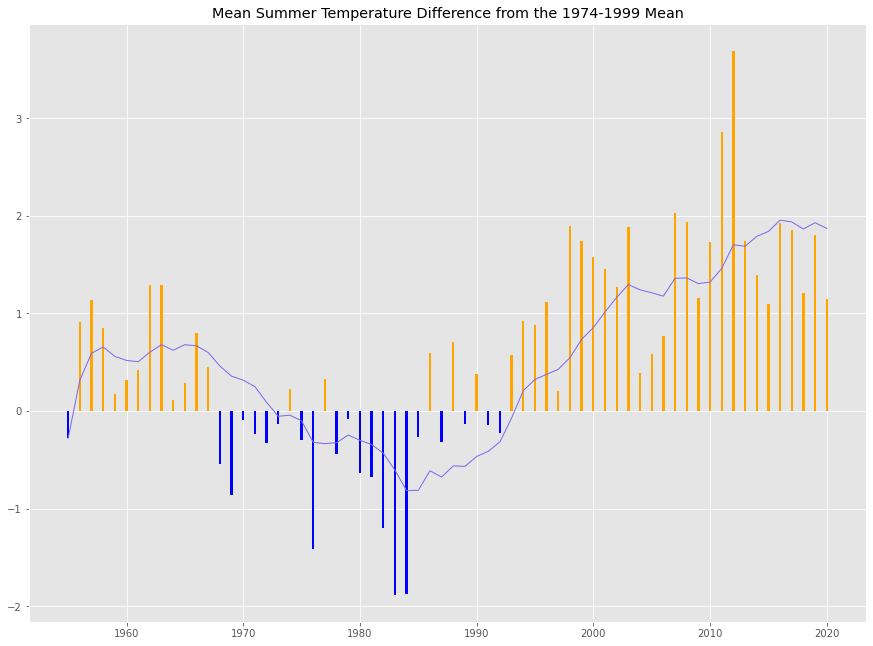

In [25]:
plt.figure(figsize=(15, 11))
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.bar(summer_df['DATE'], summer_df['DEV'], color=['orange' if (x >=0) else 'blue' for x in summer_df['DEV']], 
        width=0.2, linewidth=1)
plt.plot(summer_df['DATE'], summer_df['ROLLING_AVG'], color='mediumslateblue', linewidth=1);

### Interpretation

It can be observed from the figure, that from 1955 to 1967, the average temperatures are higher than the baseline period mean. From 1968 to 1992, the average temperatures were lower than the baseline mean, while from 1993 and later until 2020, the temperatures are much higher, with 2012 being the warmest summer.
This pattern is also confirmed by looking at the line of the 10 year rolling average of deviations from the mean.

## Evolution of Daily Temperatures

The next section will focus on the evolution of daily temperatures for the full period from 1955 to 2020. The purpose is to create a plot showing the daily temperature for each year. The line corresponding to each year will be smoothed by using a *30 days rolling average*. On that plot we will also overlay a line showing the average daily temperature for the baseline period of 1974-1999.

To begin with, we create a data frame containing the average temperatures for each day of the year during the baseline period (1974-1999), grouping by month-day date and calculating the mean.

In [26]:
final['YEAR'] = final['DATE'].dt.year
final['DAY'] = final['DATE'].dt.strftime('%m-%d')
final_daily = final.loc[(final['YEAR'].isin(range(1974, 2000))), ['DAY','TAVG']].groupby(final['DAY']).mean().reset_index()
final_daily

,DAY,TAVG
0,01-01,10.365385
1,01-02,10.707692
2,01-03,10.207692
3,01-04,9.634615
4,01-05,9.919231
...,...,...
361,12-27,9.769231
362,12-28,10.207692
363,12-29,10.776923
364,12-30,11.353846


We then calculate the 30 days rolling average of average daily temperatures for the baseline period.

In [27]:
final_daily['ROLLING_AVG'] = final_daily['TAVG'].rolling(30, min_periods=1).mean()

### Plot

Lastly, the graph is plotted using:

* Line charts depicting the daily temperature for each year, which are colored from *light orange* to *dark orange*, progressing through the years in ascending order.
* Line chart showing the average daily temperature for the baseline period of 1974-1999, which is *black*.
* The *30 days rolling average* to smooth the lines.

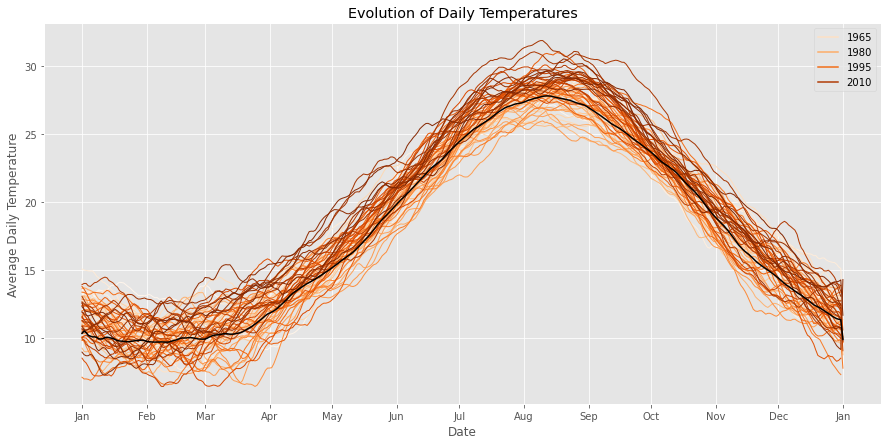

In [47]:
plt.figure(figsize=(15, 7))
plt.title("Evolution of Daily Temperatures")
plt.xlabel("Date")
plt.ylabel("Average Daily Temperature")
sns.lineplot(x='DAY', y=final['TAVG'].rolling(30, min_periods=1).mean(), 
             data=final, hue=final['YEAR'], palette="Oranges", linewidth=1)
sns.lineplot(x='DAY', y='ROLLING_AVG', data=final_daily, color='black', linewidth=1.5)
x = plt.gca().xaxis
# ticks for months
x.set_major_locator(mdates.MonthLocator())
# names for months
x.set_major_formatter(mdates.DateFormatter('%b'))

### Interpretation

By observing the line charts, we can assume that the temperatures follow a similar distribution through the year, with the highest temperatures being during summer and the lowest during winter. Specifically:
* From January to March, the temperatures are low, having an average temperature of 10°C.
* From April to mid-August, the temperatures increase, reaching an average temperature of 27°C.
* From mid-August to December, the temperatures gradually decrease from 27°C to 12°C.

Moreover, it can be seen that the temperatures tend to increase as the years pass, as the darker lines tend to be higher than the light orange ones. Especially in summer, the average temperatures in recent years have been significantly higher than the past, which could be explained by climate change.

Finally, the deviations from the baseline (black line) are higher for recent years, which is also confirmed by the previous plot. 

## Extreme Temperature Events

Another measure used by climatologists is the number of extreme events. Extreme events are defined as those beyond 5% or 10% from the expected value. 

This section will focus on extreme heat events going 10% above the baseline. The objective is to create a plot with the percentage of extreme heat events over the number of observations for each year. On that plot, we will overlay a line with the average percentage of extreme tempearture events of the baseline 1974-1999.

Initially, we join the full data frame with the data frame containing the average temperatures for each day of the year during the baseline period (1974-1999), based on day of year.

In [30]:
merged_df = pd.merge(final, final_daily, how='left', on='DAY')
merged_df.head()

,DATE,PRCP,TAVG_x,YEAR,DAY,TAVG_y,ROLLING_AVG
0,1955-01-01,0.0,14.35,1955,01-01,10.365385,10.365385
1,1955-01-02,2.0,10.70,1955,01-02,10.707692,10.536538
2,1955-01-03,0.0,12.70,1955,01-03,10.207692,10.426923
3,1955-01-04,0.0,13.05,1955,01-04,9.634615,10.228846
4,1955-01-05,0.0,13.15,1955,01-05,9.919231,10.166923


Subsequently, we create a new column which contains boolean values, *True* if this day was an extreme event (10% above the baseline), otherwise *False*, and we group by year, calculating the sum of extreme events and the number of observations for each year. We then add a column containing the percentages of extreme temperature events by year.

In [31]:
merged_df['EXTREME'] = (merged_df['TAVG_x'] > (1.1 * merged_df['TAVG_y']))
extreme_df = merged_df.groupby('YEAR')['EXTREME'].agg(['sum','count']).reset_index()
extreme_df['percentage'] = extreme_df['sum'] / extreme_df['count']
extreme_df

,YEAR,sum,count,percentage
0,1955,128,365,0.350685
1,1956,113,366,0.308743
2,1957,116,365,0.317808
3,1958,130,365,0.356164
4,1959,96,365,0.263014
...,...,...,...,...
61,2016,159,366,0.434426
62,2017,170,365,0.465753
63,2018,173,365,0.473973
64,2019,163,365,0.446575


Furthermore, we calculate the mean percentage of extreme temperature events for the baseline period 1974-1999.

In [32]:
base_mean = extreme_df.loc[extreme_df['YEAR'].isin(range(1974, 2000)), 'percentage'].mean()
print('The mean percentage of extreme temperature events for the baseline period (1974-1999) is', round(base_mean,3)*100,"%.")

The mean percentage of extreme temperature events for the baseline period (1974-1999) is 24.8 %.


### Plot

Finally, the graph is plotted using:
* A bar chart representing the percentage of extreme heat events over the number of observations for each year. The bars are colored *blue* when the percentage is below the mean percentage of extreme tempearture events for the baseline period and *orange* when it is equal or above.
* A *gray* line representing the mean percentage of extreme tempearture events for the baseline period.

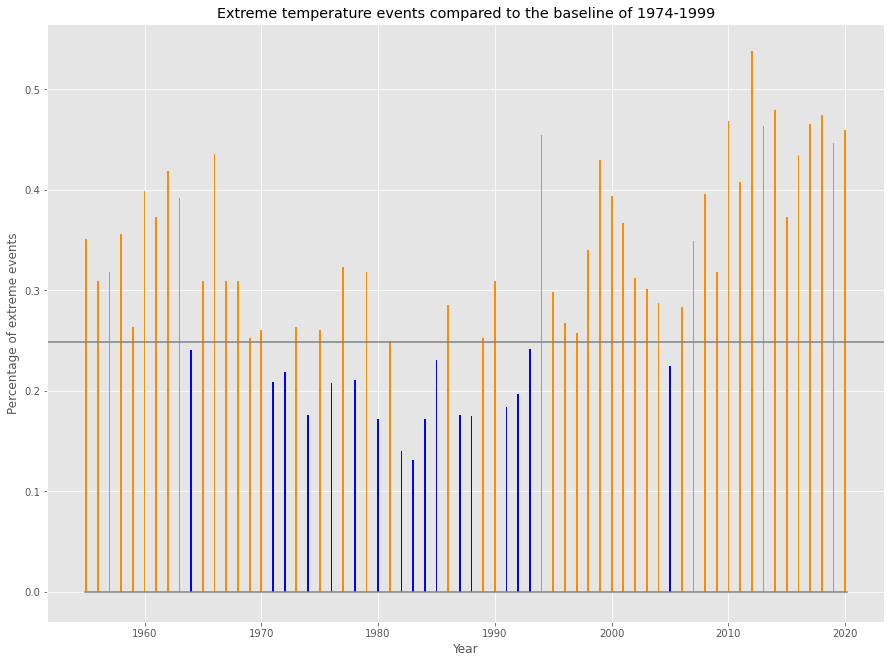

In [46]:
plt.figure(figsize=(15, 11))
ax = plt.subplot()
plt.title("Extreme temperature events compared to the baseline of 1974-1999")
plt.ylabel("Percentage of extreme events")
plt.xlabel("Year")
colors=np.where(extreme_df['percentage'] >= base_mean, 'darkorange','blue')
plt.bar(extreme_df['YEAR'], extreme_df['percentage'], color = colors, width=0.15)
plt.axhline(base_mean, color="grey")
plt.axhline(xmin=0.045, xmax=0.955, color='grey')
ax.set_ylim(bottom=-0.03);

### Interpretation

It can be observed from the figure that from 1955 to 1970 the percentage of extreme heat events was for almost every year higher than the baseline period mean percentage. After 1970 and until 1993, the extreme heat events were fewer than those of the baseline period, while from 1994 and later until 2020, the extreme events were much more, with 2012 being the year with the highest precentage of extreme heat events on record. 

The results also confirm the findings on the first graph and could be explained by the increasing global warming.

## Precipitation

Continuing the thread on extreme events, another consideration is rainfall. In this section, we are interested in finding whether precipication becomes more intense over time. Our goal is to create a plot showing the ratio of rainfall over rainy days over the years. On the plot, we will overlay the *10 year rolling average*.

To see that, we initially calculate the yearly rainfall and count the rainy days in each year. Then, by dividing the rainfall by the number of rainy days, we get an indication of whether we are getting rain in more concentrated bursts. 

In [37]:
prcp_df = final[['DATE','PRCP','YEAR']]
prcp_df.head()

,DATE,PRCP,YEAR
0,1955-01-01,0.0,1955
1,1955-01-02,2.0,1955
2,1955-01-03,0.0,1955
3,1955-01-04,0.0,1955
4,1955-01-05,0.0,1955


In [38]:
# sum precipitation values for each year to find yearly rainfall
rainfall = prcp_df.groupby('YEAR').sum()
rainfall

,PRCP
YEAR,
1955,547.0
1956,281.3
1957,303.2
1958,350.0
1959,214.0
...,...
2016,261.6
2017,304.3
2018,380.2


In [39]:
# count the rainy days by replacing 0 with NaN for days with 0 precipitation in order to be excluded from count
rainy_days = prcp_df.replace(0, np.nan).groupby('YEAR').count()
rainy_days

,DATE,PRCP
YEAR,,
1955,365,68
1956,366,52
1957,365,73
1958,365,68
1959,365,62
...,...,...
2016,366,42
2017,365,48
2018,365,55


In [40]:
# divide the rainfall by the rainy days, in order to find the rain ratio for each year
ratio = rainfall['PRCP'] / rainy_days['PRCP']
ratio

YEAR
1955    8.044118
1956    5.409615
1957    4.153425
1958    5.147059
1959    3.451613
          ...   
2016    6.228571
2017    6.339583
2018    6.912727
2019    9.827586
2020    5.536842
Name: PRCP, Length: 66, dtype: float64

We also calculate the 10 year rolling average for rainfall over rainy days ratio in order to add it to our plot.

In [41]:
rolling_avg = ratio.rolling(window=10,min_periods=1).mean()

### Plot

Lastly, we plot the graph using:
* A bar chart representing the overall rainfall over rainy days over the years.
* A line chart depicting the *10 year rolling average* for the rainfall over rainy days ratio.

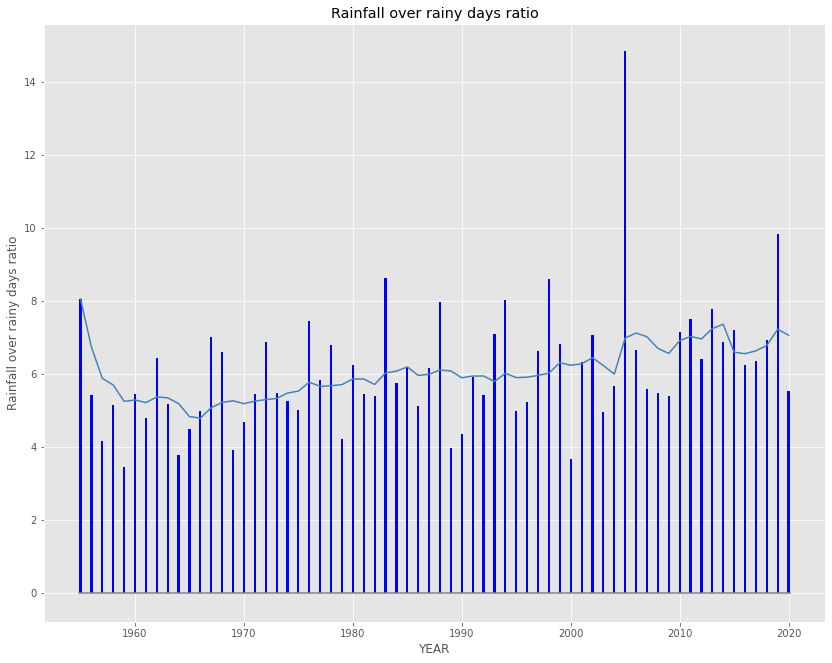

In [45]:
plt.figure(figsize=(14, 11))
ax = plt.subplot()
plt.title("Rainfall over rainy days ratio")
plt.ylabel("Rainfall over rainy days ratio")
plt.xlabel("Year")
plt.bar(ratio.index, ratio.values, width=0.2, color='blue')
rolling_avg.plot(color='steelblue')
plt.axhline(xmin=0.045, xmax=0.955, color='grey')
ax.set_ylim(bottom=-0.8);

### Interpretation

By observing at the figure, we notice that, over the years, the rain ratio has many fluctuations but gradually increases. Especially, in 2005, there were the heaviest rainfalls recorded. This can also be confirmed by the 10 year rolling average for the rainfall over rainy days ratio, which is slowly increasing.  

## Conclusion

It can be concluded from the analysis on Athens weather, that in recent years due to climate change and global warming, the weather has become more extreme, the temperatures have increased and we observe more heat waves and heavy rainfalls than in the past. Therefore, action should be taken in order to reduce environmental damage.